In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load times data from csv
light = pd.read_csv('edited_data.txt', delimiter = '\t')
light.head()

,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,9:25,10:12,11:19,12:40,13:53,14:48,14:56,14:14,13:03,11:47,10:30,9:34
1,2,9:26,10:14,11:21,12:42,13:55,14:49,14:55,14:12,13:01,11:44,10:28,9:33
2,3,9:27,10:16,11:24,12:45,13:58,14:50,14:55,14:10,12:58,11:41,10:25,9:32
3,4,9:28,10:18,11:26,12:47,14:00,14:51,14:54,14:08,12:56,11:39,10:23,9:31
4,5,9:29,10:20,11:29,12:50,14:02,14:52,14:53,14:06,12:53,11:36,10:21,9:30


In [3]:
# set the index to "Day"
light.set_index('Day', inplace=True)
light.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,9:25,10:12,11:19,12:40,13:53,14:48,14:56,14:14,13:03,11:47,10:30,9:34
2,9:26,10:14,11:21,12:42,13:55,14:49,14:55,14:12,13:01,11:44,10:28,9:33
3,9:27,10:16,11:24,12:45,13:58,14:50,14:55,14:10,12:58,11:41,10:25,9:32
4,9:28,10:18,11:26,12:47,14:00,14:51,14:54,14:08,12:56,11:39,10:23,9:31
5,9:29,10:20,11:29,12:50,14:02,14:52,14:53,14:06,12:53,11:36,10:21,9:30


In [4]:
# make sure columns are text so we can convert to float
light.dtypes

Jan    object
Feb    object
Mar    object
Apr    object
May    object
Jun    object
Jul    object
Aug    object
Sep    object
Oct    object
Nov    object
Dec    object
dtype: object

In [5]:
# create function to change time format into float
# split at the ":" then pull hours and mins (divide mins by 60 to get fraction of hour)
def decimal_time(t):
    try:
        t = t.split(':')
        hrs = float(t[0])
        mins = float(t[1]) / 60
        return str(round(hrs + mins, 3))
    except:
        return '0'
        

In [6]:
# test function just for fun
# will take string as argument
decimal_time('15:43')

'15.717'

In [7]:
# apply this function to all columns
for col in light.columns:
    light[col] = light[col].apply(decimal_time)


In [8]:
# test to see if it worked
light.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,9.417,10.2,11.317,12.667,13.883,14.8,14.933,14.233,13.05,11.783,10.5,9.567
2,9.433,10.233,11.35,12.7,13.917,14.817,14.917,14.2,13.017,11.733,10.467,9.55
3,9.45,10.267,11.4,12.75,13.967,14.833,14.917,14.167,12.967,11.683,10.417,9.533
4,9.467,10.3,11.433,12.783,14.0,14.85,14.9,14.133,12.933,11.65,10.383,9.517
5,9.483,10.333,11.483,12.833,14.033,14.867,14.883,14.1,12.883,11.6,10.35,9.5


In [9]:
# values are strings, convert to float to visualize
light = light.astype('float')
# check
light.dtypes

Jan    float64
Feb    float64
Mar    float64
Apr    float64
May    float64
Jun    float64
Jul    float64
Aug    float64
Sep    float64
Oct    float64
Nov    float64
Dec    float64
dtype: object

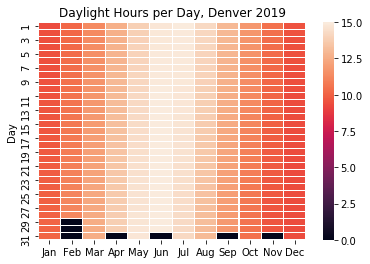

In [11]:
# create heatmap
ax = plt.axes()
sns.heatmap(light, linewidths=0.2, fmt=".0%", ax=ax)
ax.set_title('Daylight Hours per Day, Denver 2019')
plt.show()

In [12]:
# get max value of df for each column
# save it as a series then get max of monthly maximums
s = light.max(axis=1, skipna=True)
s.max()

14.983

In [13]:
# divide all values by max to see % of max daylight for each day
# first copy the df
light_2 = light.copy()

In [14]:
# then perform the math on each cell and check
for col in light_2.columns:
    light_2[col] = round(((light_2[col] / s.max()) * 100),1)
light_2.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,62.9,68.1,75.5,84.5,92.7,98.8,99.7,95.0,87.1,78.6,70.1,63.9
2,63.0,68.3,75.8,84.8,92.9,98.9,99.6,94.8,86.9,78.3,69.9,63.7
3,63.1,68.5,76.1,85.1,93.2,99.0,99.6,94.6,86.5,78.0,69.5,63.6
4,63.2,68.7,76.3,85.3,93.4,99.1,99.4,94.3,86.3,77.8,69.3,63.5
5,63.3,69.0,76.6,85.7,93.7,99.2,99.3,94.1,86.0,77.4,69.1,63.4


In [15]:
# check that previous operation worked
light_2.max()

Jan     67.7
Feb     75.2
Mar     84.2
Apr     92.4
May     98.6
Jun    100.0
Jul     99.7
Aug     95.0
Sep     87.1
Oct     78.6
Nov     70.1
Dec     63.9
dtype: float64

In [16]:
# examine data more closely
light_2.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,64.970968,64.590323,79.835484,85.696774,95.922581,96.470968,97.806452,91.361290,80.354839,74.383871,64.638710,62.825806
std,1.492022,21.591918,2.639261,16.080661,1.813231,17.908028,1.370386,2.310797,15.114713,2.522842,12.133416,0.428149
min,62.900000,0.000000,75.500000,0.000000,92.700000,0.000000,95.200000,87.400000,0.000000,70.300000,0.000000,62.400000
25%,63.650000,69.150000,77.650000,86.350000,94.450000,99.350000,96.750000,89.500000,80.750000,72.300000,65.100000,62.500000
50%,64.700000,71.100000,79.900000,88.400000,96.100000,99.800000,98.000000,91.400000,82.900000,74.300000,66.500000,62.600000
75%,66.200000,73.100000,82.050000,90.500000,97.500000,100.000000,99.050000,93.300000,85.050000,76.450000,68.200000,63.050000
max,67.700000,75.200000,84.200000,92.400000,98.600000,100.000000,99.700000,95.000000,87.100000,78.600000,70.100000,63.900000


In [17]:
# remove 0, change to NaN
light_2.replace(to_replace = 0.0, value = np.nan, inplace=True)

In [18]:
# make sure previous oepration worked
light_2.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,31.000000,28.000000,31.000000,30.000000,31.000000,30.000000,31.000000,31.000000,30.000000,31.000000,30.000000,31.000000
mean,64.970968,71.510714,79.835484,88.553333,95.922581,99.686667,97.806452,91.361290,83.033333,74.383871,66.793333,62.825806
std,1.492022,2.191117,2.639261,2.413287,1.813231,0.373920,1.370386,2.310797,2.501769,2.522842,1.849125,0.428149
min,62.900000,68.100000,75.500000,84.500000,92.700000,98.800000,95.200000,87.400000,78.900000,70.300000,64.100000,62.400000
25%,63.650000,69.650000,77.650000,86.575000,94.450000,99.450000,96.750000,89.500000,80.975000,72.300000,65.250000,62.500000
50%,64.700000,71.450000,79.900000,88.600000,96.100000,99.850000,98.000000,91.400000,83.050000,74.300000,66.600000,62.600000
75%,66.200000,73.275000,82.050000,90.600000,97.500000,100.000000,99.050000,93.300000,85.125000,76.450000,68.250000,63.050000
max,67.700000,75.200000,84.200000,92.400000,98.600000,100.000000,99.700000,95.000000,87.100000,78.600000,70.100000,63.900000


In [23]:
# create series and visualize
light_3 = pd.DataFrame(light_2.std())
light_3.rename(columns={0: "std"}, inplace=True)
light_3

,std
Jan,1.492022
Feb,2.191117
Mar,2.639261
Apr,2.413287
May,1.813231
Jun,0.373920
Jul,1.370386
Aug,2.310797
Sep,2.501769
Oct,2.522842


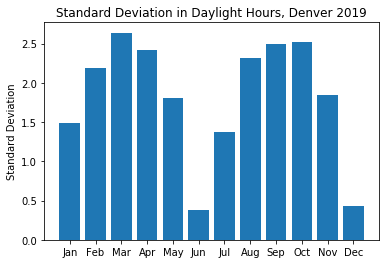

In [22]:
# Create bat graph showing "spread" of daylight hours per month
plt.bar(light_3.index, light_3['std'])
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation in Daylight Hours, Denver 2019')
plt.show()
